In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import datetime

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
CSV_COLUMN_NAMES = ['Age', 'Gender', 'TB', 'DB', 'ALK', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG_Ratio', 'Class']

In [4]:
train_data = pd.read_csv("training_data.csv", names=CSV_COLUMN_NAMES, header=0) 
test_data = pd.read_csv("testing_data.csv", names=CSV_COLUMN_NAMES, header=0) 

In [5]:
train_data=train_data.replace('?', np.NaN)
test_data=test_data.replace('?', np.NaN)

In [6]:
convert_dict = {
    'TB' : float,
    'DB' : float,
    'ALK' : float,
    'SGPT' : float,
    'SGOT' : float,
    'TP' : float,
    'ALB' : float,
    'AG_Ratio' : float
}

In [7]:
train_data = train_data.astype(convert_dict) 
test_data = test_data.astype(convert_dict)

In [8]:
MEAN = train_data.mean()

In [9]:
train_data_new = train_data.fillna(value=MEAN)

In [10]:
train_data_new["Gender"]=train_data_new["Gender"].replace('Female',1)
train_data_new["Gender"]=train_data_new["Gender"].replace('Male',0)

In [11]:
train_data_new["Class"]=train_data_new["Class"].replace({'Yes':1, 'No':0})

In [12]:
class0 = train_data_new["Class"] == 0
train_data_copy = train_data_new[class0]

In [13]:
train_data_new = train_data_new.append(train_data_copy, ignore_index=True)

In [14]:
train_data_new = train_data_new.sample(frac=1).reset_index(drop=True)

In [15]:
train_class = train_data_new.pop("Class")

In [16]:
MEAN_T = test_data.mean()

In [17]:
test_data_new = test_data.fillna(value=MEAN)

In [18]:
test_data_new["Gender"]=test_data_new["Gender"].replace('Female',1)
test_data_new["Gender"]=test_data_new["Gender"].replace('Male',0)

In [19]:
test_class = test_data_new.pop("Class")

In [20]:
test_class=test_class.replace({'Yes':1, 'No':0})

## Standardizing

In [21]:
scaler = StandardScaler()
scaler.fit(train_data_new.values)

params = scaler.mean_

In [22]:
train_data_scaled = scaler.transform(train_data_new.values)
train_data_scaled = pd.DataFrame(train_data_scaled, index=train_data_new.index, columns=train_data_new.columns)

In [23]:
train_data_scaled.describe()

,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio
count,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02
mean,-1.894781e-17,-9.473903e-18,-6.394885e-17,2.605323e-17,1.575036e-16,2.842171e-17,-6.631732e-17,-1.894781e-17,2.368476e-16,1.942150e-16
std,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00
min,-2.434528e+00,-5.865885e-01,-4.367014e-01,-4.528309e-01,-9.407155e-01,-3.710287e-01,-3.301868e-01,-3.524273e+00,-2.874246e+00,-2.121615e+00
25%,-7.288800e-01,-5.865885e-01,-3.647818e-01,-4.132453e-01,-4.579996e-01,-2.971755e-01,-2.756432e-01,-6.483731e-01,-7.351417e-01,-5.731116e-01
50%,6.302774e-02,-5.865885e-01,-3.468019e-01,-3.736598e-01,-3.295706e-01,-2.356311e-01,-2.172037e-01,9.379457e-02,1.983618e-02,1.133385e-01
75%,7.940195e-01,1.704773e+00,-1.355380e-01,-9.656073e-02,6.014498e-02,-9.407903e-02,-8.084474e-02,6.504203e-01,7.748140e-01,4.326177e-01
max,2.804247e+00,1.704773e+00,1.297631e+01,7.305942e+00,8.124601e+00,1.187630e+01,1.883409e+01,2.876923e+00,2.913918e+00,5.860363e+00


In [24]:
test_data_scaled = scaler.transform(test_data_new.values)
test_data_scaled = pd.DataFrame(test_data_scaled, index=test_data_new.index, columns=test_data_new.columns)

In [25]:
X_train = train_data_scaled.to_numpy()
y_train = train_class.to_numpy()

In [26]:
X_test = test_data_scaled.to_numpy()
y_test = test_class.to_numpy()

In [27]:
# neural network 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Activation

do = 0.5
model = Sequential()


model.add(Dense(50, input_dim=10))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(do))


model.add(Dense(50))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(do))

model.add(Dense(50))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(do))

model.add(Dense(20))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(do))


model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [30]:
path = 'temp.h5'


keras_callbacks   = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
       ModelCheckpoint(
            filepath= path,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            save_best_only=True,
            verbose=1)
]



In [31]:
# fit the keras model on the dataset

history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1, callbacks=keras_callbacks)

Epoch 1/200
52/60 [=========================>....] - ETA: 0s - loss: 0.7124 - accuracy: 0.5192
Epoch 00001: val_loss improved from inf to 0.67114, saving model to temp.h5
60/60 [==============================] - 2s 28ms/step - loss: 0.7078 - accuracy: 0.5150 - val_loss: 0.6711 - val_accuracy: 0.5733
Epoch 2/200
51/60 [========================>.....] - ETA: 0s - loss: 0.6750 - accuracy: 0.5294
Epoch 00002: val_loss improved from 0.67114 to 0.65879, saving model to temp.h5
60/60 [==============================] - 1s 10ms/step - loss: 0.6705 - accuracy: 0.5317 - val_loss: 0.6588 - val_accuracy: 0.5667
Epoch 3/200
51/60 [========================>.....] - ETA: 0s - loss: 0.6798 - accuracy: 0.5490
Epoch 00003: val_loss improved from 0.65879 to 0.64633, saving model to temp.h5
60/60 [==============================] - 1s 9ms/step - loss: 0.6696 - accuracy: 0.5633 - val_loss: 0.6463 - val_accuracy: 0.6267
Epoch 4/200
59/60 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.

Epoch 29/200
57/60 [===========================>..] - ETA: 0s - loss: 0.5727 - accuracy: 0.6702
Epoch 00029: val_loss did not improve from 0.56035
60/60 [==============================] - 1s 10ms/step - loss: 0.5697 - accuracy: 0.6700 - val_loss: 0.5676 - val_accuracy: 0.6733
Epoch 30/200
58/60 [============================>.] - ETA: 0s - loss: 0.5590 - accuracy: 0.6897
Epoch 00030: val_loss did not improve from 0.56035
60/60 [==============================] - 1s 9ms/step - loss: 0.5573 - accuracy: 0.6917 - val_loss: 0.5662 - val_accuracy: 0.6800
Epoch 31/200
56/60 [===========================>..] - ETA: 0s - loss: 0.5720 - accuracy: 0.6893
Epoch 00031: val_loss did not improve from 0.56035
60/60 [==============================] - 1s 9ms/step - loss: 0.5730 - accuracy: 0.6883 - val_loss: 0.5649 - val_accuracy: 0.6800
Epoch 32/200
60/60 [==============================] - ETA: 0s - loss: 0.5669 - accuracy: 0.6833
Epoch 00032: val_loss did not improve from 0.56035
60/60 [=================

Epoch 58/200
54/60 [==========================>...] - ETA: 0s - loss: 0.5572 - accuracy: 0.7111
Epoch 00058: val_loss improved from 0.54740 to 0.54601, saving model to temp.h5
60/60 [==============================] - 1s 9ms/step - loss: 0.5514 - accuracy: 0.7150 - val_loss: 0.5460 - val_accuracy: 0.6867
Epoch 59/200
54/60 [==========================>...] - ETA: 0s - loss: 0.5399 - accuracy: 0.6981
Epoch 00059: val_loss did not improve from 0.54601
60/60 [==============================] - 0s 8ms/step - loss: 0.5515 - accuracy: 0.6967 - val_loss: 0.5542 - val_accuracy: 0.6667
Epoch 60/200
59/60 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7085
Epoch 00060: val_loss did not improve from 0.54601
60/60 [==============================] - 1s 9ms/step - loss: 0.5535 - accuracy: 0.7100 - val_loss: 0.5524 - val_accuracy: 0.6800
Epoch 61/200
57/60 [===========================>..] - ETA: 0s - loss: 0.5287 - accuracy: 0.6982
Epoch 00061: val_loss did not improve from 0.54

59/60 [============================>.] - ETA: 0s - loss: 0.4993 - accuracy: 0.7203
Epoch 00116: val_loss did not improve from 0.52587
60/60 [==============================] - 0s 8ms/step - loss: 0.4990 - accuracy: 0.7200 - val_loss: 0.5296 - val_accuracy: 0.6733
Epoch 117/200
51/60 [========================>.....] - ETA: 0s - loss: 0.4963 - accuracy: 0.7275
Epoch 00117: val_loss did not improve from 0.52587
60/60 [==============================] - 0s 7ms/step - loss: 0.4904 - accuracy: 0.7350 - val_loss: 0.5446 - val_accuracy: 0.6800
Epoch 118/200
52/60 [=========================>....] - ETA: 0s - loss: 0.4850 - accuracy: 0.7269
Epoch 00118: val_loss did not improve from 0.52587
60/60 [==============================] - 1s 8ms/step - loss: 0.4779 - accuracy: 0.7300 - val_loss: 0.5396 - val_accuracy: 0.6667
Epoch 119/200
58/60 [============================>.] - ETA: 0s - loss: 0.5190 - accuracy: 0.7207
Epoch 00119: val_loss did not improve from 0.52587
60/60 [============================

Epoch 175/200
60/60 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.7550
Epoch 00175: val_loss did not improve from 0.49583
60/60 [==============================] - 1s 9ms/step - loss: 0.4679 - accuracy: 0.7550 - val_loss: 0.5169 - val_accuracy: 0.7000
Epoch 176/200
52/60 [=========================>....] - ETA: 0s - loss: 0.4774 - accuracy: 0.7481
Epoch 00176: val_loss did not improve from 0.49583
60/60 [==============================] - 1s 9ms/step - loss: 0.4754 - accuracy: 0.7500 - val_loss: 0.5061 - val_accuracy: 0.6867
Epoch 177/200
54/60 [==========================>...] - ETA: 0s - loss: 0.4584 - accuracy: 0.7796
Epoch 00177: val_loss did not improve from 0.49583
60/60 [==============================] - 1s 10ms/step - loss: 0.4632 - accuracy: 0.7700 - val_loss: 0.5047 - val_accuracy: 0.6933
Epoch 178/200
60/60 [==============================] - ETA: 0s - loss: 0.4840 - accuracy: 0.7550
Epoch 00178: val_loss did not improve from 0.49583
60/60 [=============

In [32]:
model.load_weights(path)

In [33]:
y_pred_ = model.predict(X_test)

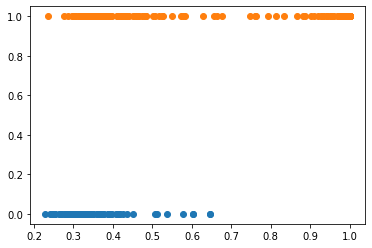

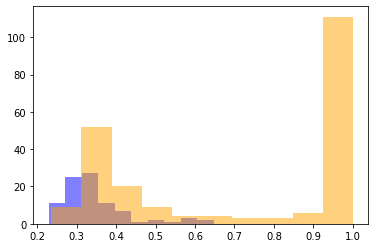

In [34]:
ind0 = np.where(y_test==0)
ind1 = np.where(y_test==1)

y_pred_0 = y_pred_[ind0]
y_pred_1 = y_pred_[ind1]
y_test_0 = y_test[ind0] 
y_test_1 = y_test[ind1]

pyplot.figure()
pyplot.scatter(y_pred_0 ,y_test_0)
pyplot.scatter(y_pred_1, y_test_1)

pyplot.figure()
pyplot.hist(y_pred_0, 10, facecolor='blue', alpha=0.5)
pyplot.hist(y_pred_1, 10, facecolor='orange', alpha=0.5)
pyplot.show()



In [35]:
y_pred = np.round(y_pred_)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 82   8]
 [ 85 136]]
              precision    recall  f1-score   support

           0       0.49      0.91      0.64        90
           1       0.94      0.62      0.75       221

    accuracy                           0.70       311
   macro avg       0.72      0.76      0.69       311
weighted avg       0.81      0.70      0.71       311



In [36]:
len(np.where(y_pred == 1)[0]) #221

144

In [37]:
len(np.where(y_pred == 0)[0]) #90

167

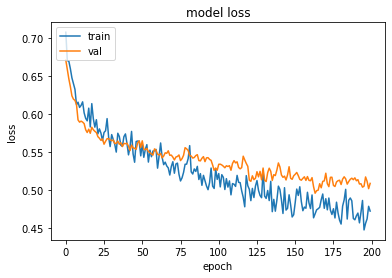

In [38]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

In [39]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 82   8]
 [ 85 136]]


In [40]:
accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
precision = TP / float(TP + FP)
false_positive_rate = FP / float(TN + FP)

In [41]:
print ('Accuracy : ',accuracy)
print ('Error rate : ',classification_error)
print ('Sensitvity : ',sensitivity)
print ('Specificity : ',specificity)
print ('Precision : ',precision)
print ('FPR : ',false_positive_rate)

Accuracy :  0.7009646302250804
Error rate :  0.2990353697749196
Sensitvity :  0.6153846153846154
Specificity :  0.9111111111111111
Precision :  0.9444444444444444
FPR :  0.08888888888888889
